In [3]:
!pip install yfinance

  Using cached yfinance-0.2.55-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Using cached peewee-3.17.9-py3-none-any.whl
Using cached yfinance-0.2.55-py2.py3-none-any.whl (109 kB)
Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [7]:
start='2015-01-01'
end='2024-12-31'
stock='GOOG'

data=yf.download(stock,start,end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [9]:
data

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2015-01-02,26.045290,26.365888,26.010055,26.253728,28951268
2015-01-05,25.502361,26.021471,25.462164,25.968368,41196796
2015-01-06,24.911293,25.616757,24.866133,25.558443,57998800
2015-01-07,24.868610,25.173524,24.796649,25.161415,41301082
2015-01-08,24.947023,24.986726,24.367368,24.714268,67071641
...,...,...,...,...,...
2024-12-23,195.766968,196.266399,191.411929,193.809192,15235900
2024-12-24,197.345184,197.445061,194.975874,195.946768,6809800


In [11]:
data.reset_index(inplace=True)

In [13]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2015-01-02,26.045290,26.365888,26.010055,26.253728,28951268
1,2015-01-05,25.502361,26.021471,25.462164,25.968368,41196796
2,2015-01-06,24.911293,25.616757,24.866133,25.558443,57998800
3,2015-01-07,24.868610,25.173524,24.796649,25.161415,41301082
4,2015-01-08,24.947023,24.986726,24.367368,24.714268,67071641
...,...,...,...,...,...,...
2510,2024-12-23,195.766968,196.266399,191.411929,193.809192,15235900
2511,2024-12-24,197.345184,197.445061,194.975874,195.946768,6809800
2512,2024-12-26,196.875717,197.934509,195.647106,196.516126,7907900


In [15]:
ma_100_day=data.Close.rolling(100).mean()

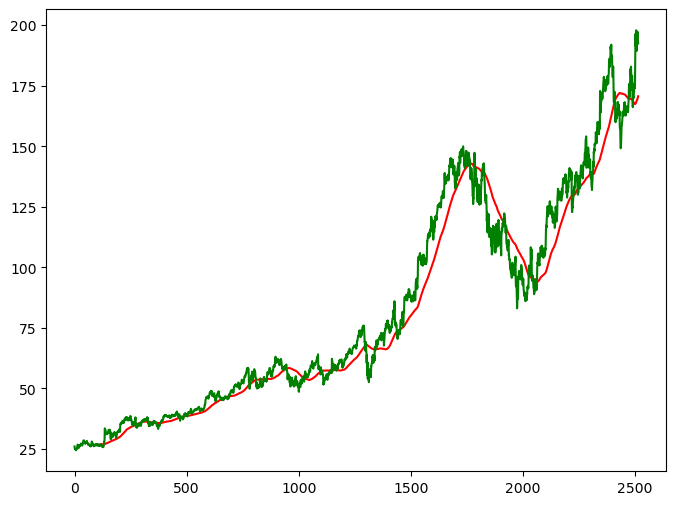

In [17]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_day,'r')
plt.plot(data.Close,'g')
plt.show()

In [19]:
ma_200_day=data.Close.rolling(200).mean()

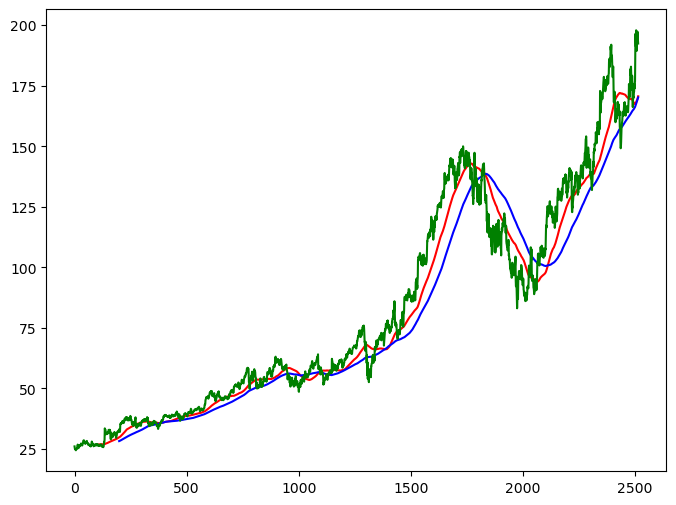

In [23]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_day,'r')
plt.plot(ma_200_day,'b')
plt.plot(data.Close,'g')
plt.show()

In [25]:
data.dropna(inplace=True)

In [31]:
data_train=pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test=pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [33]:
data_train.shape[0]

2012

In [35]:
data_test.shape[0]

503

In [41]:
!pip install scikit-learn

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [49]:
data_train_scale=scaler.fit_transform(data_train)

In [53]:
x,y=[],[]
for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [ ]:
x1
for i in range(100, data_train_scale.shape[0]):
    x.append(data_train[i-100:i])
    y.append(data_train[i,0])

In [57]:
!pip install keras

   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ----------------------- ---------------- 0.8/1.3 MB 4.8 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 4.1 MB/s eta 0:00:00


In [61]:
!pip install tensorflow

   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/376.0 MB 4.2 MB/s eta 0:01:29
   ---------------------------------------- 1.8/376.0 MB 5.3 MB/s eta 0:01:11
   ---------------------------------------- 2.9/376.0 MB 5.4 MB/s eta 0:01:09
   ---------------------------------------- 3.9/376.0 MB 5.3 MB/s eta 0:01:10
    --------------------------------------- 5.2/376.0 MB 5.2 MB/s eta 0:01:11
    --------------------------------------- 6.3/376.0 MB 5.2 MB/s eta 0:01:11
    --------------------------------------- 7.3/376.0 MB 5.3 MB/s eta 0:01:10
    --------------------------------------- 8.7/376.0 MB 5.3 MB/s eta 0:01:10
   - -------------------------------------- 9.7/376.0 MB 5.3 MB/s eta 0:01:10
   - -------------------------------------- 10.7/376.0 MB 5.3 MB/s eta 0:01:10
   - -------------------------------------- 12.1/376.0 MB 5.3 MB/s eta 0:01:09
   - -------------------------------------- 13.1/376.0 MB 5.3 MB/s et

In [69]:
x,y=np.array(x),np.array(y)

In [71]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [79]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True, input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [83]:
model.compile(optimizer="adam", loss="mean_squared_error")

In [85]:
model.fit(x,y,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 25s 176ms/step - loss: 0.0900
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 156ms/step - loss: 0.0112
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 191ms/step - loss: 0.0076
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 182ms/step - loss: 0.0071
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 18s 145ms/step - loss: 0.0057
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 167ms/step - loss: 0.0066
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 161ms/step - loss: 0.0061
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 187ms/step - loss: 0.0063
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 161ms/step - loss: 0.0051
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 160ms/step - loss: 0.0042
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 179ms/step - loss: 0.0046
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 168ms/step - loss: 0.0054
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 158ms/step - loss: 0.0051
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 190ms/step - loss: 0.0037
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 1

In [87]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                │ (None, 100, 50)       │       10,400 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_10 (Dropout)          │ (None, 100, 50)       │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ lstm_11 (LSTM)                │ (None, 100, 60)       │       26,640 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_11 (Dropout)          │ (None, 100, 60)       │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ lstm_12 (LSTM)                │ (None, 100, 80)       │       45,120 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_12 (Dropout)          │ (None, 100, 80)       │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ lstm_13 (LSTM)                │ (None, 120)           │       96,480 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_13 (Dropout)          │ (None, 120)           │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense (Dense)                 │ (None, 1)             │          121 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [89]:
past_100_day=data_train.tail(100)

In [93]:
data_test=pd.concat([past_100_day,data_test],ignore_index=True)

In [97]:
data_test_scale=scaler.fit_transform(data_test)

In [102]:
x,y=[],[]
for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x,y=np.array(x),np.array(y)

In [103]:
y_predict=model.predict(x)

16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 177ms/step


In [112]:
scale=1/scaler.scale_

In [114]:
y_predict*=scale

In [116]:
y*=scale

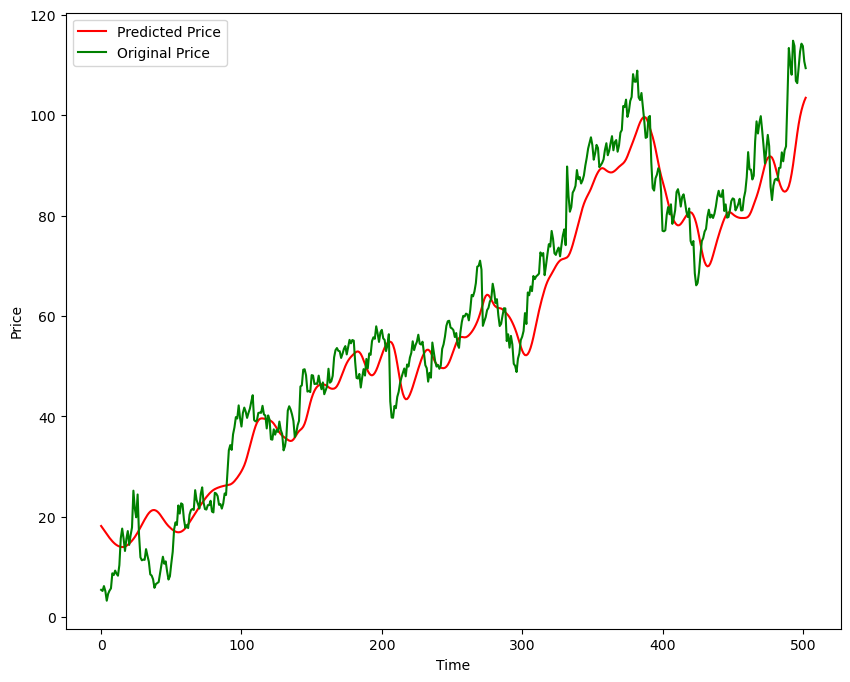

In [120]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label="Predicted Price")
plt.plot(y,'g',label="Original Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

In [124]:
model.save("Stock Prediction Model.keras")